## Key Clouds

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import nltk

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package genesis to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
df = pd.read_csv('comments.csv')
df['textOriginal'] = df['textOriginal'].str.replace("\n" , "  ")
df['textOriginal'] = df['textOriginal'].str.replace("\'", " ")
df.head()

,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,publishedAt,updatedAt,commentLikeCount,viewCount,commentCount,videoLikeCount,videoTitle,videoDate,textClean
0,EfH0oscLFhk,Du coup peut on dire qu’on a encore plus de ch...,Du coup peut on dire qu’on a encore plus de ch...,Minx,https://yt3.ggpht.com/ytc/AKedOLQAMtKSrCPfkjfg...,http://www.youtube.com/channel/UCm1YdSnO2Y7vuw...,UCm1YdSnO2Y7vuwTr6yTKwAw,True,none,2022-01-01T17:22:33Z,2022-01-01T17:22:33Z,992,380065,834,34255,La vie est-elle un (gros) coup de chance ? - D...,2022-01-01T17:18:55Z,du coup peut on dire qu’on a encore plus de ch...
1,EfH0oscLFhk,"J&#39;ai eu ton livre à Noël, il est incroyabl...","J ai eu ton livre à Noël, il est incroyable, m...",Maxime ',https://yt3.ggpht.com/ytc/AKedOLRol_dSsQ7cG04a...,http://www.youtube.com/channel/UCeoRNNIN1PVzIh...,UCeoRNNIN1PVzIhhoxhSDv6g,True,none,2022-01-01T17:24:31Z,2022-01-01T17:24:31Z,358,380065,834,34255,La vie est-elle un (gros) coup de chance ? - D...,2022-01-01T17:18:55Z,"j'ai eu ton livre à noël, il est incroyable, m..."
2,EfH0oscLFhk,"Ton livre a Noël, meilleur cadeau ! Merci 😊","Ton livre a Noël, meilleur cadeau ! Merci 😊",Light,https://yt3.ggpht.com/8Z5CHat3_hAP1fIOHdEasFFD...,http://www.youtube.com/channel/UCdg5gH0YGsCA3T...,UCdg5gH0YGsCA3ThvnFE4jUw,True,none,2022-01-03T12:12:39Z,2022-01-03T12:12:39Z,9,380065,834,34255,La vie est-elle un (gros) coup de chance ? - D...,2022-01-01T17:18:55Z,"ton livre a noël, meilleur cadeau ! merci 😊"
3,EfH0oscLFhk,J&#39;avais vu quelque chose de similaire à la...,J avais vu quelque chose de similaire à la con...,Freus,https://yt3.ggpht.com/ytc/AKedOLTHMoGzOI1pQIy8...,http://www.youtube.com/channel/UCxW95IvsTELQpb...,UCxW95IvsTELQpbKvXIjhLRA,True,none,2022-01-01T17:47:38Z,2022-01-01T17:47:38Z,374,380065,834,34255,La vie est-elle un (gros) coup de chance ? - D...,2022-01-01T17:18:55Z,j'avais vu quelque chose de similaire à la con...
4,EfH0oscLFhk,Y&#39;a marqué &quot;conlusion&quot; ca m&#39;...,"Y a marqué ""conlusion"" ca m a perturbé. Voilà....",Zaccky Fair,https://yt3.ggpht.com/ytc/AKedOLSoCvUi9VoDpvkN...,http://www.youtube.com/channel/UCrrRcJrbUD3K0H...,UCrrRcJrbUD3K0HJbLjKjSGg,True,none,2022-01-01T23:56:45Z,2022-01-01T23:56:45Z,24,380065,834,34255,La vie est-elle un (gros) coup de chance ? - D...,2022-01-01T17:18:55Z,"y'a marqué ""conlusion"" ca m'a perturbé. voilà...."


## Tokenisation

In [4]:
content = " ".join(df['textOriginal'])
type(content)

str

In [5]:
def clean_text(text):
    text = text.lower() # mettre les mots en minuscule
    text = " ".join(text.split())
    return text

content = clean_text(content)

In [6]:
words = nltk.word_tokenize(content, language='french')
words[1030:1050]

['bien',
 'illustrer',
 'le',
 'propos',
 'et',
 'aide',
 'à',
 'donner',
 'plus',
 'de',
 'sens',
 '^^',
 'en',
 'plus',
 'il',
 'me',
 'fait',
 'beaucoup',
 'rire',
 'merci']

In [7]:
words = [word for word in words if word.isalpha()]
words[1030:1050]

['la',
 'vidéo',
 'se',
 'termine',
 'sans',
 'une',
 'réponse',
 'tranchée',
 'et',
 'je',
 'suis',
 'satisfait',
 'd',
 'en',
 'avoir',
 'eu',
 'deux',
 'merci',
 'super',
 'vidéo']

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Retirer les stopwords

In [9]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
#print(stopwords.words("french"))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
stop_words = set(stopwords.words('french'))

words = [w for w in words if not w in stop_words]
print(words[1030:1050])

['année', 'commence', 'très', 'vidéo', 'dirty', 'biology', 'rien', 'telle', 'dirtybiology', 'quantique', 'si', 'oui', 'chaud', 'comme', 'découverte', 'toujours', 'aussi', 'intéressant', 'merci', 'livre']


## Word Cloud

In [11]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
text = " ".join(words)
type(text)

str

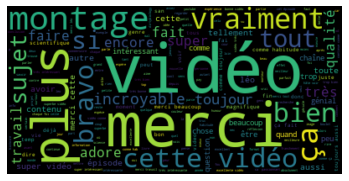

In [14]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

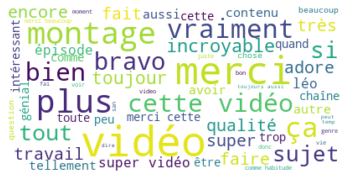

In [15]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=60, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
# Save the image in the img folder:
wordcloud.to_file("./graphs/wordcloud1.png")

### Autre essai

In [17]:
mask = np.array(Image.open("mask.png"))
#mask

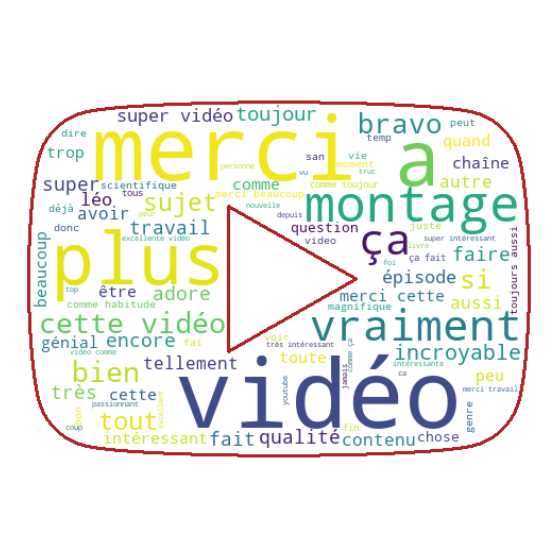

In [19]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=90, mask=mask,
               stopwords=stop_words, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("./graphs/logo_youtube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()